In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

In [2]:
df = pd.read_csv('Book_Dataset_1.csv')
df.head()

,Unnamed: 0,Title,Category,Price,Price_After_Tax,Tax_amount,Avilability,Number_of_reviews,Book_Description,Image_Link,Stars
0,0,A Light in the Attic,Poetry,51.77,51.77,0.0,22,0,It's hard to imagine a world without A Light i...,http://books.toscrape.com/media/cache/fe/72/fe...,3
1,1,Tipping the Velvet,Historical Fiction,53.74,53.74,0.0,20,0,"""Erotic and absorbing...Written with starling ...",http://books.toscrape.com/media/cache/08/e9/08...,1
2,2,Soumission,Fiction,50.10,50.10,0.0,20,0,"Dans une France assez proche de la nÃ´tre, un ...",http://books.toscrape.com/media/cache/ee/cf/ee...,1
3,3,Sharp Objects,Mystery,47.82,47.82,0.0,20,0,"WICKED above her hipbone, GIRL across her hear...",http://books.toscrape.com/media/cache/c0/59/c0...,4
4,4,Sapiens: A Brief History of Humankind,History,54.23,54.23,0.0,20,0,From a renowned historian comes a groundbreaki...,http://books.toscrape.com/media/cache/ce/5f/ce...,5


In [3]:
len(df)*0.05

50.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Title              1000 non-null   object 
 2   Category           1000 non-null   object 
 3   Price              1000 non-null   float64
 4   Price_After_Tax    1000 non-null   float64
 5   Tax_amount         1000 non-null   float64
 6   Avilability        1000 non-null   int64  
 7   Number_of_reviews  1000 non-null   int64  
 8   Book_Description   1000 non-null   object 
 9   Image_Link         1000 non-null   object 
 10  Stars              1000 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [5]:
df.corr()

,Unnamed: 0,Price,Price_After_Tax,Tax_amount,Avilability,Number_of_reviews,Stars
Unnamed: 0,1.000000,0.016563,0.016563,NaN,-0.978961,NaN,-0.014017
Price,0.016563,1.000000,1.000000,NaN,-0.010914,NaN,0.028166
Price_After_Tax,0.016563,1.000000,1.000000,NaN,-0.010914,NaN,0.028166
Tax_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avilability,-0.978961,-0.010914,-0.010914,NaN,1.000000,NaN,0.016166
Number_of_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stars,-0.014017,0.028166,0.028166,NaN,0.016166,NaN,1.000000


In [6]:
df['Category'].value_counts()

Default               152
Nonfiction            110
Sequential Art         75
Add a comment          67
Fiction                65
Young Adult            54
Fantasy                48
Romance                35
Mystery                32
Food and Drink         30
Childrens              29
Historical Fiction     26
Poetry                 19
Classics               19
History                18
Horror                 17
Womens Fiction         17
Science Fiction        16
Science                14
Music                  13
Business               12
Thriller               11
Travel                 11
Philosophy             11
Humor                  10
Autobiography           9
Art                     8
Psychology              7
Religion                7
Spirituality            6
Christian Fiction       6
New Adult               6
Sports and Games        5
Biography               5
Self Help               5
Health                  4
Christian               3
Politics                3
Contemporary

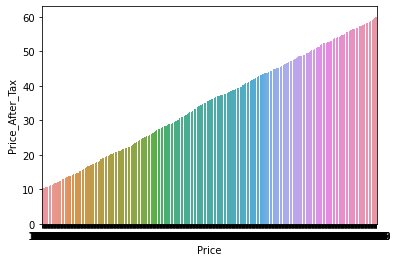

In [7]:
sns.barplot(data=df, x='Price',y='Price_After_Tax')
plt.show()

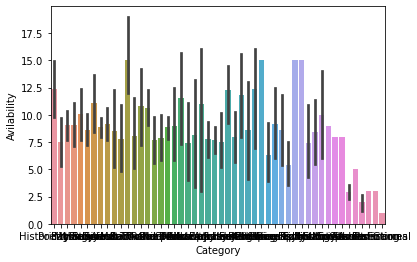

In [8]:
sns.barplot(data=df, x='Category',y='Avilability')
plt.show()

In [9]:
df.agg(['mean','std'])

,Unnamed: 0,Price,Price_After_Tax,Tax_amount,Avilability,Number_of_reviews,Stars
mean,499.500000,35.07035,35.07035,0.0,8.585000,0.0,2.923000
std,288.819436,14.44669,14.44669,0.0,5.654622,0.0,1.434967


In [10]:
df.groupby('Category').agg(mean_Stars=('Stars','mean'),
                          std_Stars=('Stars','std'))

,mean_Stars,std_Stars
Category,,
Academic,2.000000,NaN
Add a comment,2.761194,1.338130
Adult Fiction,5.000000,NaN
Art,3.625000,0.916125
Autobiography,3.000000,1.732051
Biography,2.200000,0.836660
Business,2.916667,1.564279
Childrens,2.620690,1.320546
Christian,2.666667,2.081666


In [11]:
threshold = len(df)*0.05
threshold

50.0

In [12]:
cols_to_drop = df.columns[df.isna().sum()<=threshold]
cols_to_drop

Index(['Unnamed: 0', 'Title', 'Category', 'Price', 'Price_After_Tax',
       'Tax_amount', 'Avilability', 'Number_of_reviews', 'Book_Description',
       'Image_Link', 'Stars'],
      dtype='object')

In [13]:
df.dropna(subset=cols_to_drop,inplace=True)

In [14]:
cols_with_missing_values = df.columns[df.isna().sum()>0]
cols_with_missing_values

Index([], dtype='object')

In [15]:
for col in cols_with_missing_values[:-1]:
    df[col].fillna(df[col].mode()[0])

In [16]:
df.isna().sum()

Unnamed: 0           0
Title                0
Category             0
Price                0
Price_After_Tax      0
Tax_amount           0
Avilability          0
Number_of_reviews    0
Book_Description     0
Image_Link           0
Stars                0
dtype: int64

In [17]:
Books_prices = df.groupby('Category')['Price_After_Tax'].median()
Books_prices

Category
Academic              13.120
Add a comment         36.170
Adult Fiction         15.360
Art                   42.080
Autobiography         40.850
Biography             39.550
Business              33.630
Childrens             28.540
Christian             47.720
Christian Fiction     34.220
Classics              35.010
Contemporary          31.770
Crime                 10.970
Cultural              36.580
Default               36.025
Erotica               19.190
Fantasy               43.580
Fiction               39.720
Food and Drink        31.830
Health                51.345
Historical            22.830
Historical Fiction    31.610
History               41.290
Horror                36.970
Humor                 31.290
Music                 35.020
Mystery               25.385
New Adult             44.180
Nonfiction            32.150
Novels                54.810
Paranormal            15.400
Parenting             37.350
Philosophy            29.930
Poetry                38.770
Polit

In [18]:
df.select_dtypes('object')

,Title,Category,Book_Description,Image_Link
0,A Light in the Attic,Poetry,It's hard to imagine a world without A Light i...,http://books.toscrape.com/media/cache/fe/72/fe...
1,Tipping the Velvet,Historical Fiction,"""Erotic and absorbing...Written with starling ...",http://books.toscrape.com/media/cache/08/e9/08...
2,Soumission,Fiction,"Dans une France assez proche de la nÃ´tre, un ...",http://books.toscrape.com/media/cache/ee/cf/ee...
3,Sharp Objects,Mystery,"WICKED above her hipbone, GIRL across her hear...",http://books.toscrape.com/media/cache/c0/59/c0...
4,Sapiens: A Brief History of Humankind,History,From a renowned historian comes a groundbreaki...,http://books.toscrape.com/media/cache/ce/5f/ce...
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,\n\n\n\n\n\n,http://books.toscrape.com/media/cache/99/df/99...
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,High school student Kei Nagai is struck dead i...,http://books.toscrape.com/media/cache/30/98/30...
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,"In Englandâs Regency era, manners and elegan...",http://books.toscrape.com/media/cache/f9/6b/f9...
998,1st to Die (Women's Murder Club #1),Mystery,"James Patterson, bestselling author of the Ale...",http://books.toscrape.com/media/cache/f6/8e/f6...


In [19]:
df['Category'].value_counts()

Default               152
Nonfiction            110
Sequential Art         75
Add a comment          67
Fiction                65
Young Adult            54
Fantasy                48
Romance                35
Mystery                32
Food and Drink         30
Childrens              29
Historical Fiction     26
Poetry                 19
Classics               19
History                18
Horror                 17
Womens Fiction         17
Science Fiction        16
Science                14
Music                  13
Business               12
Thriller               11
Travel                 11
Philosophy             11
Humor                  10
Autobiography           9
Art                     8
Psychology              7
Religion                7
Spirituality            6
Christian Fiction       6
New Adult               6
Sports and Games        5
Biography               5
Self Help               5
Health                  4
Christian               3
Politics                3
Contemporary

In [20]:
df['Category'].nunique()

50

In [21]:
data=df.sort_values('Category').tail(5)
data

,Unnamed: 0,Title,Category,Price,Price_After_Tax,Tax_amount,Avilability,Number_of_reviews,Book_Description,Image_Link,Stars
839,839,Golden (Heart of Dread #3),Young Adult,42.21,42.21,0.0,3,0,The action-packed finale to the Heart of Dread...,http://books.toscrape.com/media/cache/c2/8b/c2...,4
327,327,Catching Jordan (Hundred Oaks),Young Adult,50.83,50.83,0.0,14,0,ONE OF THE BOYSWhat girl doesn't want to be su...,http://books.toscrape.com/media/cache/f4/8b/f4...,3
942,942,The Art of Not Breathing,Young Adult,40.83,40.83,0.0,1,0,"Since her twin brother, Eddie, drowned five ye...",http://books.toscrape.com/media/cache/0b/9f/0b...,4
375,375,No Love Allowed (Dodge Cove #1),Young Adult,54.65,54.65,0.0,12,0,It's all fun and parties until someone falls i...,http://books.toscrape.com/media/cache/41/e1/41...,4
456,456,South of Sunshine,Young Adult,28.93,28.93,0.0,8,0,What is Kaycee willing to risk for the sake of...,http://books.toscrape.com/media/cache/34/65/34...,1


In [22]:
df['Category'].str.contains('Young Adult')

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Category, Length: 1000, dtype: bool

In [23]:
target = df['Price']

dummie_col = [
    'Title',
    'Category',
    'Book_Description',
    'Image_Link'
    
]

In [24]:
df = pd.get_dummies(df, columns= dummie_col)

In [25]:
drop_col = [
    'Tax_amount',
    'Number_of_reviews',
    
    
]
df = df.drop(drop_col, axis=1)

In [26]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0.00,1.00,2.0,3.00,4.00
Price,51.77,53.74,50.1,47.82,54.23
Price_After_Tax,51.77,53.74,50.1,47.82,54.23
Avilability,22.00,20.00,20.0,20.00,20.00
Stars,3.00,1.00,1.0,4.00,5.00
...,...,...,...,...,...
Image_Link_http://books.toscrape.com/media/cache/fe/a4/fea443d174c2c9f0c7903f6c6a3ecc62.jpg,0.00,0.00,0.0,0.00,0.00
Image_Link_http://books.toscrape.com/media/cache/fe/a9/fea9278c15f5ad41f5d478196cf4132d.jpg,0.00,0.00,0.0,0.00,0.00
Image_Link_http://books.toscrape.com/media/cache/ff/48/ff48b0696fb97b7f7b5c6d15e372cb70.jpg,0.00,0.00,0.0,0.00,0.00
Image_Link_http://books.toscrape.com/media/cache/ff/b8/ffb857154e4bc8af56f33d7277cb9939.jpg,0.00,0.00,0.0,0.00,0.00


In [27]:
scaling_columns = [
    'Price',
    'Price_After_Tax',
    'Avilability',
    'Stars'
    
]

for column in scaling_columns:
    df[column] = (df[column] - df[column].mean())/df[column].std()
df.head().T

,0,1,2,3,4
Unnamed: 0,0.000000,1.000000,2.000000,3.000000,4.000000
Price,1.155950,1.292313,1.040353,0.882531,1.326231
Price_After_Tax,1.155950,1.292313,1.040353,0.882531,1.326231
Avilability,2.372396,2.018703,2.018703,2.018703,2.018703
Stars,0.053660,-1.340101,-1.340101,0.750540,1.447420
...,...,...,...,...,...
Image_Link_http://books.toscrape.com/media/cache/fe/a4/fea443d174c2c9f0c7903f6c6a3ecc62.jpg,0.000000,0.000000,0.000000,0.000000,0.000000
Image_Link_http://books.toscrape.com/media/cache/fe/a9/fea9278c15f5ad41f5d478196cf4132d.jpg,0.000000,0.000000,0.000000,0.000000,0.000000
Image_Link_http://books.toscrape.com/media/cache/ff/48/ff48b0696fb97b7f7b5c6d15e372cb70.jpg,0.000000,0.000000,0.000000,0.000000,0.000000
Image_Link_http://books.toscrape.com/media/cache/ff/b8/ffb857154e4bc8af56f33d7277cb9939.jpg,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df, target,
    test_size=0.3, shuffle=True, random_state=42  
)
X_train.head()

,Unnamed: 0,Price,Price_After_Tax,Avilability,Stars,"Title_""Most Blessed of the Patriarchs"": Thomas Jefferson and the Empire of the Imagination",Title_#GIRLBOSS,Title_#HigherSelfie: Wake Up Your Life. Free Your Soul. Find Your Tribe.,Title_'Salem's Lot,Title_(Un)Qualified: How God Uses Broken People to Do Big Things,...,Image_Link_http://books.toscrape.com/media/cache/fe/1a/fe1afbd5caf79c3c957bfc5cf46f141e.jpg,Image_Link_http://books.toscrape.com/media/cache/fe/72/fe72f0532301ec28892ae79a629a293c.jpg,Image_Link_http://books.toscrape.com/media/cache/fe/74/fe7494f92b03b9c178cf19a038011f18.jpg,Image_Link_http://books.toscrape.com/media/cache/fe/8a/fe8af6ceec7718986380c0fde9b3b34f.jpg,Image_Link_http://books.toscrape.com/media/cache/fe/a1/fea18082a98781b8e87bdf99065f4887.jpg,Image_Link_http://books.toscrape.com/media/cache/fe/a4/fea443d174c2c9f0c7903f6c6a3ecc62.jpg,Image_Link_http://books.toscrape.com/media/cache/fe/a9/fea9278c15f5ad41f5d478196cf4132d.jpg,Image_Link_http://books.toscrape.com/media/cache/ff/48/ff48b0696fb97b7f7b5c6d15e372cb70.jpg,Image_Link_http://books.toscrape.com/media/cache/ff/b8/ffb857154e4bc8af56f33d7277cb9939.jpg,Image_Link_http://books.toscrape.com/media/cache/ff/f6/fff64acb3c65cbea2ac9209c2a57af17.jpg
541,541,-0.355815,-0.355815,-0.280302,1.447420,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,440,0.058813,0.058813,0.073391,-0.643220,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,482,0.593191,0.593191,-0.103455,-1.340101,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,422,1.647412,1.647412,0.073391,0.750540,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,778,-0.716451,-0.716451,-0.987688,-0.643220,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_train.shape

(700, 3053)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Define cross-validation folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [32]:
lin_reg = LinearRegression().fit(X_train_scaled, y_train)

In [33]:
# Get R2 score
lin_reg.score(X_train_scaled, y_train)

1.0

In [34]:
lr_scores = -1 * cross_val_score(lin_reg, 
                                 X_train_scaled, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lr_scores

array([9.1427856 , 9.68658223, 9.61458434, 8.56535175, 8.50305647,
       9.20613546, 9.57455172, 9.22627151, 9.60603184, 9.43412879])

In [35]:
lr_score_train = np.mean(lr_scores)
lr_score_train

9.255947971777886

In [36]:
# Predict
y_predicted = lin_reg.predict(X_test_scaled)
lr_score_test = mean_squared_error(y_test, y_predicted, squared=False) # RMSE instead of MSE
lr_score_test

8.653966172736222

In [37]:
#Lasso Regression 

In [38]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg = Lasso().fit(X_train_scaled, y_train)

In [39]:
# Get R2 score
lasso_reg.score(X_train_scaled, y_train)

0.99515645158523

In [40]:
lasso_scores = -1 * cross_val_score(lasso_reg, 
                                    X_train_scaled, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
lasso_scores

array([1.01457085, 1.07873907, 1.06312122, 0.90627419, 0.87812892,
       1.01052456, 1.05912923, 1.009246  , 0.98305768, 0.99757499])

In [41]:
lasso_score_train = np.mean(lasso_scores)
lasso_score_train

1.0000366708353317

In [42]:
# Predict
y_predicted = lasso_reg.predict(X_test_scaled)
lasso_score_test = mean_squared_error(y_test, y_predicted, squared=False)
lasso_score_test

1.0175054193124649

In [43]:
#Ridge Regression

In [44]:
ridge_reg = Ridge().fit(X_train_scaled, y_train)

In [45]:
# Get R2 score
ridge_reg.score(X_train_scaled, y_train)

0.9999999197331555

In [46]:
ridge_scores = -1 * cross_val_score(ridge_reg, 
                                    X_train_scaled, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
ridge_scores

array([9.15642377, 9.71571123, 9.5705939 , 8.28638793, 8.04278514,
       9.18240796, 9.43606043, 9.21833843, 9.0144936 , 9.08366845])

In [47]:
ridge_score_train = np.mean(ridge_scores)
ridge_score_train

9.070687084454873

In [48]:
#Predict
y_predicted = ridge_reg.predict(X_test_scaled)
ridge_score_test = mean_squared_error(y_test, y_predicted, squared=False)
ridge_score_test

8.847483233284528

In [49]:
# Principal Components Regression
#Evaluate for a different number of principal components

In [50]:
lin_reg = LinearRegression()
rmse_list = []
# First generate all the principal components
pca = PCA()
X_train_pc = pca.fit_transform(X_train_scaled)
X_train_pc.shape

(700, 700)

In [51]:
# View explained variance ratio for each principal component
pca.explained_variance_ratio_

array([2.39704995e-03, 2.37901720e-03, 1.98767715e-03, 1.93389013e-03,
       1.91135738e-03, 1.89607775e-03, 1.89327435e-03, 1.88947889e-03,
       1.88357273e-03, 1.87862009e-03, 1.87538950e-03, 1.87486627e-03,
       1.87373671e-03, 1.87237799e-03, 1.87111295e-03, 1.87042505e-03,
       1.86950467e-03, 1.86906392e-03, 1.86817366e-03, 1.86799413e-03,
       1.86741703e-03, 1.86721277e-03, 1.86695320e-03, 1.86642532e-03,
       1.86592459e-03, 1.86506891e-03, 1.86493527e-03, 1.86437404e-03,
       1.86424216e-03, 1.86386402e-03, 1.86383144e-03, 1.86343234e-03,
       1.86334740e-03, 1.86312291e-03, 1.86276141e-03, 1.86233729e-03,
       1.86217156e-03, 1.86206141e-03, 1.86178351e-03, 1.86171857e-03,
       1.86152347e-03, 1.86146593e-03, 1.86139520e-03, 1.86139520e-03,
       1.86139520e-03, 1.86139520e-03, 1.86139520e-03, 1.81583232e-03,
       1.78964527e-03, 1.74045212e-03, 1.40488185e-03, 1.39666549e-03,
       1.39604640e-03, 1.39604640e-03, 1.39604640e-03, 1.39604640e-03,
      

In [52]:
# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
0,-0.424822,0.018278,0.022042,0.006723,-0.000426,-0.012749,0.000276,0.003022,-0.000449,-0.000487,...,-7.633048e-16,1.142673e-15,3.902970e-16,7.158562e-16,3.181905e-16,2.201877e-16,2.198787e-16,2.142730e-14,0.003219,-0.894045
1,-0.019750,-0.431625,-0.018552,-0.002974,0.006796,-0.000014,-0.002573,0.000497,0.006724,-0.009533,...,1.251789e-17,1.030636e-16,-8.967899e-18,5.040506e-17,-6.586192e-19,1.283104e-18,7.346504e-17,-3.330669e-16,-0.006143,0.011269
2,-0.019750,-0.431625,-0.018552,-0.002974,0.006796,-0.000014,-0.002573,0.000497,0.006724,-0.009533,...,-1.542718e-17,4.932362e-17,-4.527365e-17,2.154907e-18,-4.449747e-17,-6.356922e-17,2.102159e-17,-2.393918e-16,-0.006143,-0.001526
3,0.424299,-0.020087,-0.017091,-0.009625,-0.006070,0.005753,0.004023,-0.001139,-0.003780,0.001975,...,-9.477543e-16,1.243592e-15,3.934193e-16,9.238497e-16,5.011196e-16,2.635912e-16,2.631993e-16,2.225563e-14,-0.001896,-0.214600
4,0.033737,-0.039686,0.366401,0.074242,0.001093,-0.000725,0.015091,0.006837,-0.017238,-0.006605,...,2.496274e-16,-1.808992e-16,9.600052e-17,-1.725340e-16,-8.089253e-17,-2.448786e-17,2.205811e-17,7.229460e-16,0.000325,-0.006059


In [53]:
# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)

In [54]:
rmse_list

[14.36823948671324,
 3.0051047415756154,
 2.954584158439075,
 2.9546261646038277,
 2.9493858610397883,
 2.9511888889312674,
 2.951280155299685,
 2.954647416109503,
 2.9519344459704104,
 2.9420259960485193,
 2.941475579605064,
 2.943775159360109,
 2.9526255524782097,
 2.9508192500662696,
 2.9495269196328047,
 2.951987678921997,
 2.953026809947054,
 2.955214104502825,
 2.9594092421523266,
 2.961962373002094,
 2.964620396589873,
 2.9722817523636826,
 2.975988865184352,
 2.982485533874141,
 2.991952779195795,
 3.0057959977163815,
 3.012511733469391,
 3.023507272881724,
 3.0248182238125523,
 3.035599136751933,
 3.0440140018800506,
 3.046755199442331,
 3.0614974100807566,
 3.0998947100551937,
 3.1498905795398113,
 3.2637598531966114,
 3.3463465910073538,
 3.3878287036352526,
 3.43079103427914,
 3.5149653459895234,
 3.5811043390378665,
 4.078275688912339,
 4.851116936220395,
 5.775887191065843,
 8.035881393576634,
 12.379862634983864,
 19.57399785792043,
 68.43821092054841,
 139.7879604515433

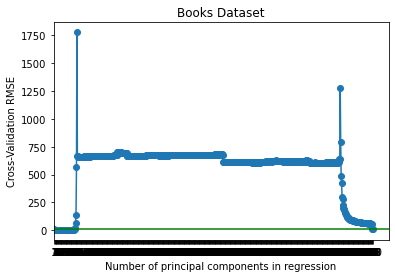

In [65]:
# Plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('Books Dataset')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

In [56]:
# Visually determine optimal number of principal components
best_pc_num = 9

In [57]:
#Predict
# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

In [58]:
# Get R2 score
lin_reg_pc.score(X_train_pc[:,:best_pc_num], y_train)

0.957711941245188

In [59]:
pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()
pcr_score_train

2.9519344459704104

In [60]:
# Get principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]
X_test_pc.shape

(300, 9)

In [61]:
# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)
pcr_score_test

9.213013795007466

In [62]:
#Evaluation

In [63]:
train_metrics = np.array([round(lr_score_train,3), 
                          round(lasso_score_train,3), 
                          round(ridge_score_train,3), 
                          round(pcr_score_train,3)]) 
train_metrics = pd.DataFrame(train_metrics, columns=['RMSE (Train Set)'])
train_metrics.index = ['Linear Regression', 
                       'Lasso Regression', 
                       'Ridge Regression', 
                       f'PCR ({best_pc_num} components)']
train_metrics

,RMSE (Train Set)
Linear Regression,9.256
Lasso Regression,1.000
Ridge Regression,9.071
PCR (9 components),2.952


In [64]:
test_metrics = np.array([round(lr_score_test,3), 
                         round(lasso_score_test,3), 
                         round(ridge_score_test,3), 
                         round(pcr_score_test,3)]) 
test_metrics = pd.DataFrame(test_metrics, columns=['RMSE (Test Set)'])
test_metrics.index = ['Linear Regression', 
                      'Lasso Regression', 
                      'Ridge Regression', 
                      f'PCR ({best_pc_num} components)']
test_metrics

,RMSE (Test Set)
Linear Regression,8.654
Lasso Regression,1.018
Ridge Regression,8.847
PCR (9 components),9.213
